In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data,targets = make_blobs(cluster_std=[1.34,1.5,1.5])

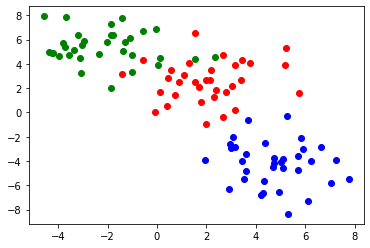

In [3]:
datax = [[]for i in range(3)]
datay = [[]for i in range(3)]
for i,color in zip(range(3),['b','g','r']):
    datax[i] = [d[0] for j,d in enumerate(data) if targets[j] == i]
    datay[i] = [d[1] for j,d in enumerate(data) if targets[j] == i]
    plt.plot(datax[i],datay[i],'o',color=color)


In [4]:
def random_means_generate(data,K): # generates K random points to initialize the K-means algorithm
    data_x = data[:,0]
    data_y = data[:,1]
    x_range = (min(data_x),max(data_x))
    y_range = (min(data_y),max(data_y))
    means = np.random.rand(K,2)*np.array([x_range[1] - x_range[0] , y_range[1] - y_range[0]]) + \
    np.array([x_range[0],y_range[0]])
    return means

In [46]:
def K_means(data,K,tol=1e-5,means = None):
    if np.all(means != None):
        data_mean_dist = np.array([[np.linalg.norm(d-m) for m in means] for d in data])
        
        data_rel = np.array([[int(dist == min(data_mean_dist[i])) for dist in data_mean_dist[i]]
        for i,d in enumerate(data)])
        
        means_total_rel = np.sum(data_rel.T,axis=1)
        means_next = [[] for i in range(K)]
        for j,m in enumerate(means_next): 
            means_next[j].append(np.dot(data_rel[:,j],data[:,0])/means_total_rel[j])
            means_next[j].append(np.dot(data_rel[:,j],data[:,1])/means_total_rel[j])
        means_next = np.array(means_next)
        if np.linalg.norm(means-means_next) < tol:
            return means_next
        else:
            return K_means(data,K,tol,means=means_next)
    means = random_means_generate(data,K)
    return K_means(data,K,tol,means=means)

In [47]:
K_means(data,3)

array([[ 4.77295062, -4.32280421],
       [-2.38231789,  5.40814391],
       [ 2.19921381,  2.5447045 ]])